In [1]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import numpy

In [2]:
def activation(x):
    y = 1.0 / (1 + numpy.exp(-x))
    return y

In [3]:
#def RBM_(n_v,n_h, biases): dont make  biases as an agurment cuz it will cause a disaster based on tests 

def RBM_(n_v,n_h):  
    #dont use numpy.random.rand use numpy.random.randn cuz in rand case we to increase the number of the iterations
    weights = 0.1 * numpy.random.randn(n_v,n_h)  
    #adding the baises 
    weights = numpy.insert(weights, 0, 0, axis = 0)
    weights = numpy.insert(weights, 0, 0, axis = 1)
    return weights

In [4]:
def training(input_vector,weights,num_hidden,iteration,learning_rate):
    
    #adding the bais to the first row 
    input_vector = numpy.insert(input_vector, 0, 1, axis = 1)
    
    for i in range(iteration):  
        
        #<v.w>for all values 
        data_W = numpy.dot(input_vector, weights)  
        
        # caluate the sigm(v.w)
        out_act_hidden = activation(data_W) 
        
        # hidden statues accept zero or 1  #+1 cuz of the biases
        # graphical model
        # use numpy.random.rand not numpy.random.randn
        # length of input vector 
        L = input_vector.shape[0]
    
        _hidden_status_ = out_act_hidden > numpy.random.rand(L,num_hidden + 1) 
        
        #  (V_up) = v.sigm(v.w)
        _in_to_out_ = numpy.dot(input_vector.T, out_act_hidden)
        
        # a matrix of ones and zeros  []. W^T
        _hidden_weights_ = numpy.dot(_hidden_status_, weights.T)  
        
        # sigm([].W^T)
        _out_down_up_ = activation (_hidden_weights_) 
        
         # (sigm([].W^T).W)
        hidden_input = numpy.dot(_out_down_up_,weights)
        
        
        # sigm((sigm([].W^T).W))
        out_act_hidden_1 = activation(hidden_input) 
        
        # V_down = sigm([].W^T) . sigm((sigm([].W^T).W))
        _out_to_in_ = numpy.dot(_out_down_up_.T, out_act_hidden_1)
        
        
        #  W = W + (V_down - V_up /L)*learning_rate from RBM theory
        weights = weights + ((_in_to_out_- _out_to_in_) / L) *learning_rate 
        
        # (v-v')^2 based on CE
        Er = numpy.sum((input_vector - _out_down_up_) ** 2) 
        
        
        #print(weights)
        print("iteration %s: error = %s" % (i, Er))
    
    #print(_hidden_weights_)
    print(weights)

In [11]:
w=RBM_(4,1)
training_data = numpy.array([[1,1,1,0],[1,0,1,0], [0,0,1,1],[0,0,1,1]])
training(training_data,w,1,20,0.1)



iteration 0: error = 5.0
iteration 1: error = 4.8831261822522105
iteration 2: error = 4.956572442801936
iteration 3: error = 4.915497204746453
iteration 4: error = 4.684274170359585
iteration 5: error = 4.872152545347308
iteration 6: error = 4.706021754051222
iteration 7: error = 4.516464172087331
iteration 8: error = 4.519406046017489
iteration 9: error = 4.479898105305288
iteration 10: error = 4.250895105955469
iteration 11: error = 4.225444641432095
iteration 12: error = 4.1973404423514165
iteration 13: error = 3.7578515638459695
iteration 14: error = 3.8381316311567035
iteration 15: error = 3.9423071144923476
iteration 16: error = 4.00313393356743
iteration 17: error = 3.70473123096168
iteration 18: error = 3.416350323897398
iteration 19: error = 3.5881269822526036
[[ 0.56296363  0.54987035]
 [ 0.03566498  0.04099474]
 [-0.20847197 -0.31167099]
 [ 0.57228115  0.49076182]
 [ 0.03236882  0.13872001]]


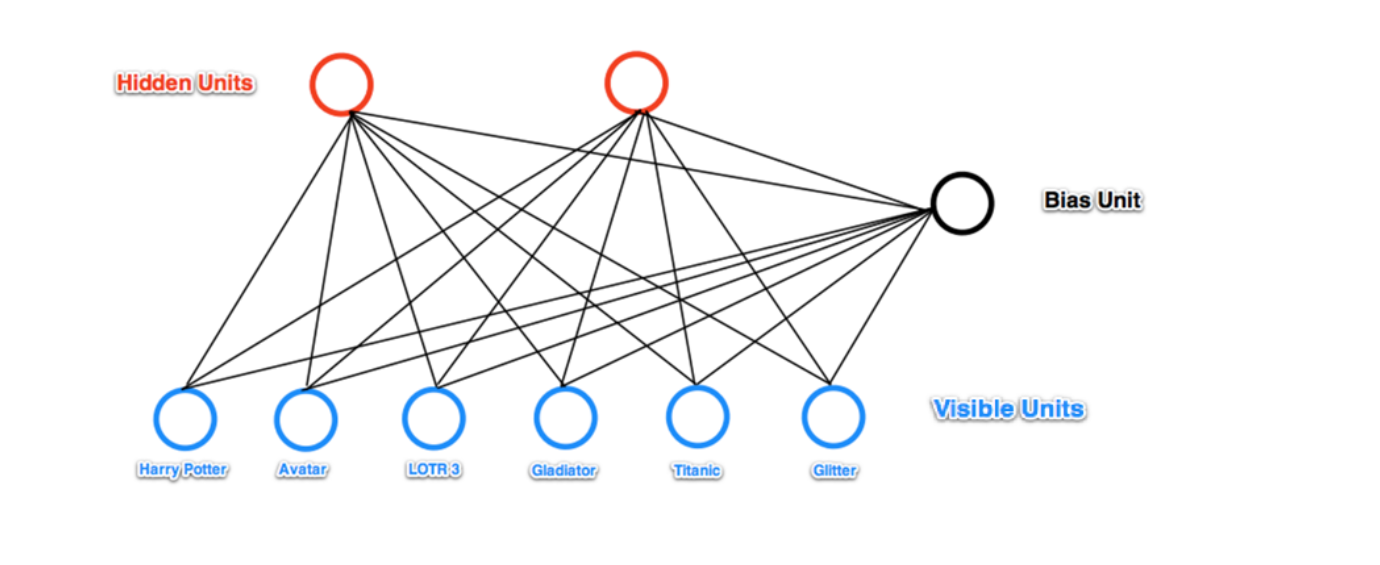

In [9]:
from IPython.display import Image
Image(filename='C:\RBM.png')
#  I used the same example to check the output of my code 
#  http://blog.echen.me/2011/07/18/introduction-to-restricted-boltzmann-machines/

In [ ]:
#Alice: (Harry Potter = 1, Avatar = 1, LOTR 3 = 1, Gladiator = 0, Titanic = 0, Glitter = 0). Big SF/fantasy fan.
#Bob: (Harry Potter = 1, Avatar = 0, LOTR 3 = 1, Gladiator = 0, Titanic = 0, Glitter = 0). SF/fantasy fan, but doesn't like Avatar.
#Carol: (Harry Potter = 1, Avatar = 1, LOTR 3 = 1, Gladiator = 0, Titanic = 0, Glitter = 0). Big SF/fantasy fan.
#David: (Harry Potter = 0, Avatar = 0, LOTR 3 = 1, Gladiator = 1, Titanic = 1, Glitter = 0). Big Oscar winners fan.
#Eric: (Harry Potter = 0, Avatar = 0, LOTR 3 = 1, Gladiator = 1, Titanic = 1, Glitter = 0). Oscar winners fan, except for Titanic.
#Fred: (Harry Potter = 0, Avatar = 0, LOTR 3 = 1, Gladiator = 1, Titanic = 1, Glitter = 0). Big Oscar winners fan.


In [10]:
w=RBM_(6,2)
training_data = numpy.array([[1,1,1,0,0,0],[1,0,1,0,0,0],[1,1,1,0,0,0],[0,0,1,1,1,0], [0,0,1,1,0,0],[0,0,1,1,1,0]])
training(training_data,w,2,20,0.1)




iteration 0: error = 10.382875693318702
iteration 1: error = 10.045837785592356
iteration 2: error = 10.19851002631435
iteration 3: error = 9.99133644165576
iteration 4: error = 9.375700266027597
iteration 5: error = 9.747123751649056
iteration 6: error = 9.051981206916798
iteration 7: error = 8.905279202022296
iteration 8: error = 8.632606893983285
iteration 9: error = 8.356841336762928
iteration 10: error = 8.493868536658855
iteration 11: error = 8.0659195882503
iteration 12: error = 7.47161297673008
iteration 13: error = 8.142618285788815
iteration 14: error = 8.026551111276907
iteration 15: error = 7.546113847683058
iteration 16: error = 7.028310871501972
iteration 17: error = 6.867905990511273
iteration 18: error = 7.94948767101817
iteration 19: error = 7.02167861908404
[[ 0.51812387  0.52928993  0.59085459]
 [ 0.04210692  0.00140829  0.11195162]
 [-0.13768023 -0.01703226 -0.09281914]
 [ 0.4948777   0.4770019   0.77488609]
 [ 0.03665801  0.0687284   0.07323616]
 [-0.13690029  0.06